<a href="https://colab.research.google.com/github/alexlabuda/Classification_Penguins/blob/main/Classification_PalmerPenguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Palmer Penguins Classification and EDA**

# Load packages

- Load some of the required packages for this notebook

- If cell 3 does not run, uncomment and run the following `!pip` cell:

In [3]:
!pip install palmerpenguins

In [4]:
import palmerpenguins # the data
from palmerpenguins import load_penguins # the data
import numpy as np
import pandas as pd
import seaborn as sns # for pretty charts
import sklearn # modeling
import matplotlib as mpl # plotting
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# The Data

Data were collected and made available by [Dr. Kristen Gorman](htthttps://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.phpps://) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).
- There are **3 different species of penguins** in this dataset, collected from 3 islands in the **Palmer Archipelago, Antarctica.**

In [5]:
penguins = load_penguins()
penguins.head(6)
# penguins['species'].value_counts()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [6]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

**Categorical Data:**
- `species`, `island`, `sex`; *nominal*
- `year` *ordinal*

**Numerical Data:**
- `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` ; *continuous*

**Target Variable**
- `species`

We also have some missing values to deal with:


In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [8]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
df = penguins.copy() # this allows alterations to be made to new data without changing original data

- Seems like the continuous variables missing all come from the same two records.
- Let's take a look at the sex variable

In [10]:
df[df['sex'].isna()] # display the records with nans in a dataframe

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


- I'll drop record 3 and 271 since most of their data is missing
- We will explore ways to deal with the rest of the missing values

In [11]:
df.drop(index=[3,271], inplace=True) # drop records inplace
df.reset_index(inplace=True, drop=True) # reset index and drop old index

In [12]:
# now we have 9 missing values in the sex attribute only
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
dtype: int64

- We could drop these variables, however lets try to see if we can impute them using another approach later on
- Lets examine the data further to see if we can find a good method for this
  - I'll drop the `year` column since it won't be very useful for this task

In [13]:
df.drop(columns='year', inplace=True) # inplace = true saves the change immediately without having to save in a new object
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## Exploratory Data Analysis & Visualization

Using [Seaborn](https://seaborn.pydata.org/index.html) 
- Now for some fun exploring the patterns of the different species of penguins and their features:

In [14]:
# Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


**Positive Skew:**
- Flipper length
- Body Mass

**Negative Skew:**
- Bill Depth


In [15]:
import scipy.stats as stats

# print skewness of each attribute
for (colName, colData) in df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].iteritems():
  print("Feature name: {0}, Skewness: {1}".format(colName, stats.skew(colData)))

Feature name: bill_length_mm, Skewness: 0.05288480859327655
Feature name: bill_depth_mm, Skewness: -0.14283462620259435
Feature name: flipper_length_mm, Skewness: 0.3441638335300089
Feature name: body_mass_g, Skewness: 0.4682639641669921


In [16]:
# print kurtosis of each attribute
for (colName, colData) in df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].iteritems():
  print("Feature name: {0}, Skewness: {1}".format(colName, stats.kurtosis(colData)))

Feature name: bill_length_mm, Skewness: -0.880764584838206
Feature name: bill_depth_mm, Skewness: -0.911154686323207
Feature name: flipper_length_mm, Skewness: -0.987434426797829
Feature name: body_mass_g, Skewness: -0.7262425917239979


In [17]:
# correlation matrix
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


- Body Mass has a very strong positive correlation with flipper length
- Also Flipper length and Bill length have a strong positive correlation

**Let's look at the distribution of our target variables:**

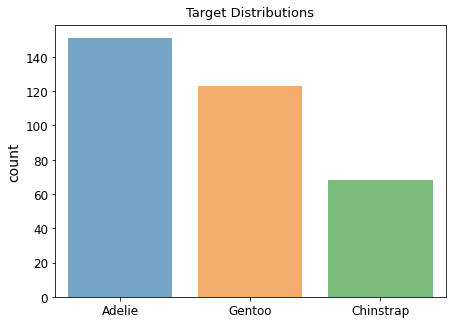

In [18]:
# lets see what our target distribution looks like
plt.figure(figsize=(7,5))
sns.countplot(x = df['species'], alpha = 0.65, saturation=0.85)
plt.title('Target Distributions', size = 13, y = 1.01)
plt.xlabel("")
plt.tick_params(axis='both', labelsize = 12)

- When dealing with uneven target distributions, we may want to consider Stratified Sampling to preserve distribution among training and testing sets; more on this later.

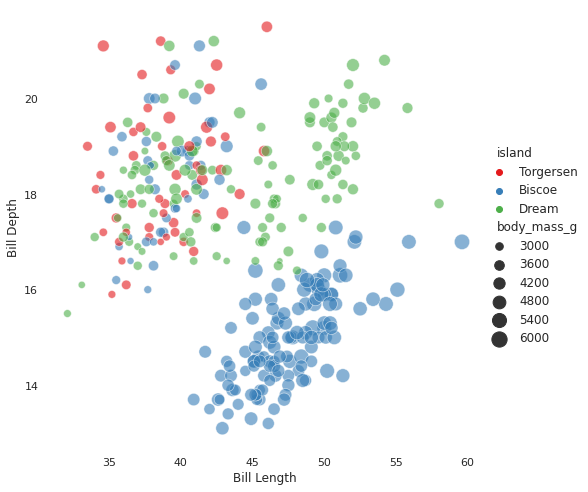

In [19]:
sns.set_theme(style="white")
g = sns.relplot(data=df, alpha = 0.6,
                x="bill_length_mm", y="bill_depth_mm",
                hue="island", size="body_mass_g",
                palette="Set1", sizes=(40, 250),height = 7)

g.despine(left=True, bottom=True) # removes axis spines
g.set_axis_labels("Bill Length", "Bill Depth")

It seems Biscoe Island may have larger birds

- We can create the same plot but replace `hue` with `species` to look into this more:

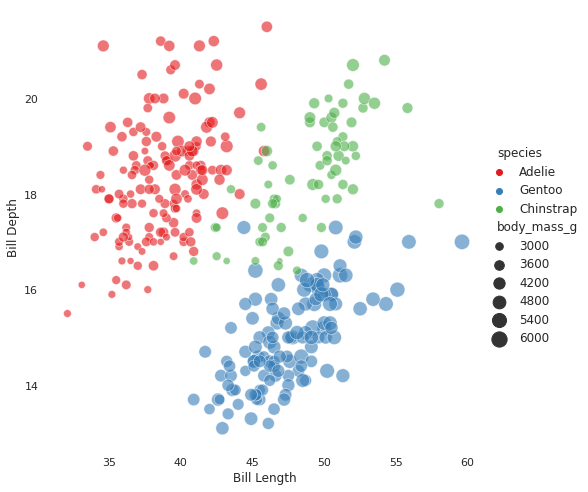

In [20]:
sns.set_theme(style="white")
g = sns.relplot(
    data=df, sizes=(40, 250), alpha = 0.6,
    x="bill_length_mm", y="bill_depth_mm",
    hue="species", size="body_mass_g",
    palette="Set1", height = 7)

g.despine(left=True, bottom=True) # removes axis spines
g.set_axis_labels("Bill Length", "Bill Depth")

- It seems like **`species`** **Chinstrap** may be primarily located on Biscoe island and it seems them may also be natually larger birds.

We can also group data by island, and species count the records on each:

In [21]:
# df['species'].groupby(['island', 'species']).count()/ len(df)

# wrap with two square brackets to return a dataframe
df.groupby(['island', 'species'])[['species']].count()

species
island    species           
Biscoe    Adelie          44
          Gentoo         123
Dream     Adelie          56
          Chinstrap       68
Torgersen Adelie          51

- Biscoe island does not have Chinstrap species and is the only island to contain Gentoo.

- Torgersen island are made up of only Adelie species
  - We are missing features from a penguin from Torgersen
  - It might be a good idea to replace these features based on the Adelie species

- Each island contains some Adelie species

**Let's make some boxplots to explore the varying weights of the penguins:**

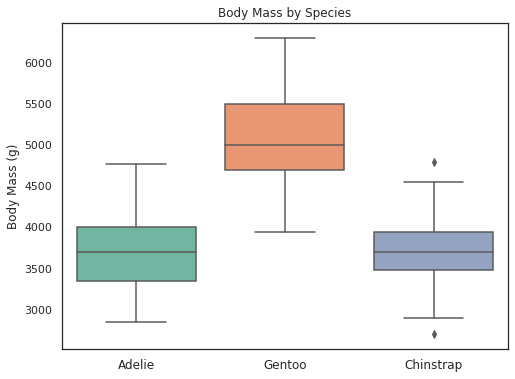

In [22]:
ax = plt.figure(figsize = (8,6))
ax = sns.boxplot(data=df, x = 'species', y ='body_mass_g',
                 palette="Set2")
ax.set_ylabel('Body Mass (g)')
ax.set_xlabel("")
ax.set_title('Body Mass by Species')
ax.tick_params(axis='x', labelsize = 12)

- Gentoo are heavier penguins
- Similar weights between the others
- We also see some outlier in body mass for Chinstrap

Text(0.5, 1.0, 'Bill Depth by Species')

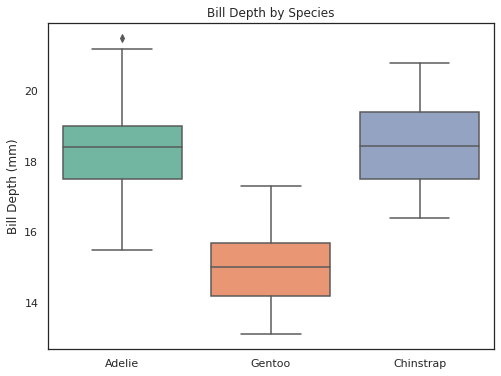

In [23]:
ax = plt.figure(figsize = (8,6))
ax = sns.boxplot(data=df, x = 'species', y ='bill_depth_mm',
                 palette="Set2")
ax.set_ylabel('Bill Depth (mm)')
ax.set_xlabel("")
ax.set_title('Bill Depth by Species')

- Gentoo has smaller Bill depth
- Similar sizes between Chinstrap and Adelie, larger than Gentoo.
- We have 1 outlier in Bill depth for the Adelie species

Text(0.5, 1.0, 'Bill length by Species')

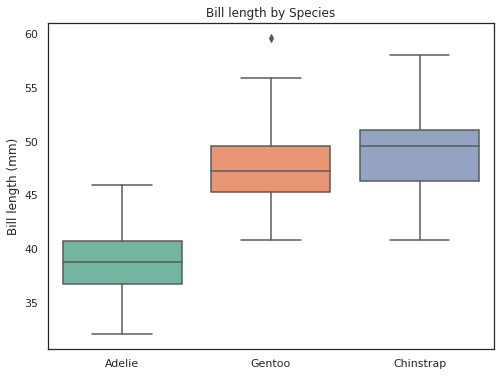

In [24]:
ax = plt.figure(figsize = (8,6))
ax = sns.boxplot(data=df, x = 'species', y ='bill_length_mm',
                 palette="Set2")
ax.set_ylabel('Bill length (mm)')
ax.set_xlabel("")
ax.set_title('Bill length by Species')

- Gentoo and Chinstrap species has similar Bill Lengths
- Adelie generally has shorter bill lengths
- Outlier in Bill length for the Gentoo species

Text(0.5, 1.0, 'Flipper length by Species')

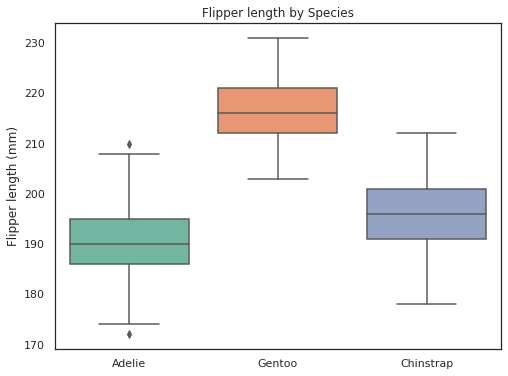

In [25]:
ax = plt.figure(figsize = (8,6))
ax = sns.boxplot(data=df, x = 'species', y ='flipper_length_mm',
                 palette="Set2")
ax.set_ylabel('Flipper length (mm)')
ax.set_xlabel("")
ax.set_title('Flipper length by Species')

- Gentoo has larger Flipper lengths


**Now lets compare the various species' attributes by sex:**

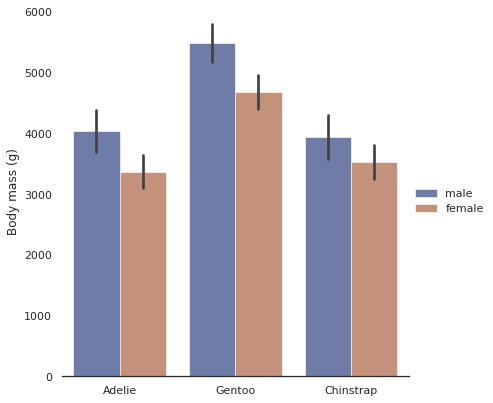

In [26]:
g = sns.catplot(
    data=df, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

- According to the data, male and female penguins mostly differ in body mass across each species
- However, we would need to perform a t-Test to test if this is significant

Let's detour and see how this could be performed:

### Detour: Hypothesis Test - Group Means

In [27]:
# seperate male from female Adelie species
male = df[df['sex'] == 'male']
male_adel_spec = male[male['species'] =='Adelie']
female = df[df['sex'] =='female']
female_adel_spec = female[female['species'] =='Adelie']

# Convert to array
body_mass_male = np.array(male_adel_spec['body_mass_g'])
body_mass_female = np.array(female_adel_spec['body_mass_g'])

In [28]:
# standard deviations of the two groups
body_mass_male.std(), body_mass_female.std()

(344.42794038444447, 267.52867026993727)

- This suggests different variances among the groups

**Null:** In the population, male and female Adelie penguins have equal mean body weights (g).

**Alternative:** In the population, male and female Adelie penguins have unequal mean body weights (g).

- **Alpha:** 0.05 (*Significance level:* probability we are willing to accept for making a type 1 error (if the null were actually true and we reject it)).
  - Reject the null if p-value < Alpha
- **Test Statistic:** Sample Mean
- **Test:** t-Test for means of two independent samples; unequal variances 

In [29]:
from scipy.stats import ttest_ind

result = ttest_ind(body_mass_male, body_mass_female, equal_var=False)

print("Since p-value= {:1.4f}, --> reject the null hypothesis".format(result.pvalue))
print("   There is no evidence to suggest that male and female Adelie penguins' mean body weights (g) are equal.")

Since p-value= 0.0000, --> reject the null hypothesis
   There is no evidence to suggest that male and female Adelie penguins' mean body weights (g) are equal.


- We could do this for all groups but lets detour back to visualizations

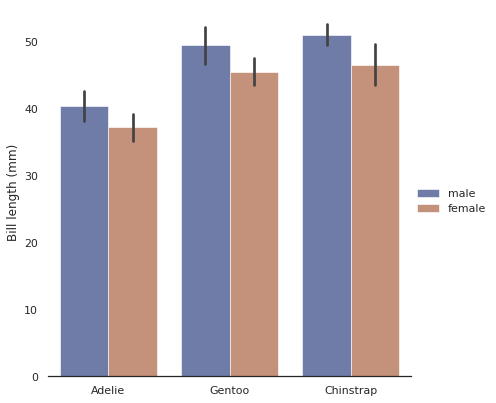

In [30]:
g = sns.catplot(
    data=df, kind="bar",
    x="species", y="bill_length_mm", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Bill length (mm)")
g.legend.set_title("")

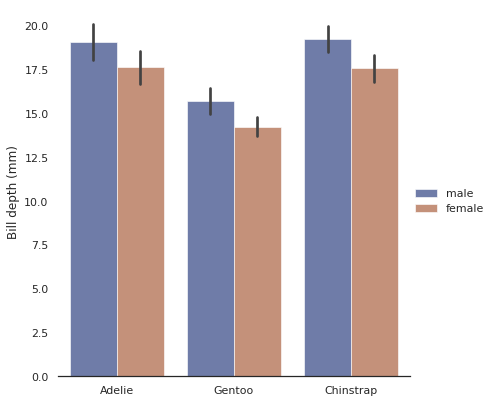

In [31]:
g = sns.catplot(
    data=df, kind="bar",
    x="species", y="bill_depth_mm", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Bill depth (mm)")
g.legend.set_title("")

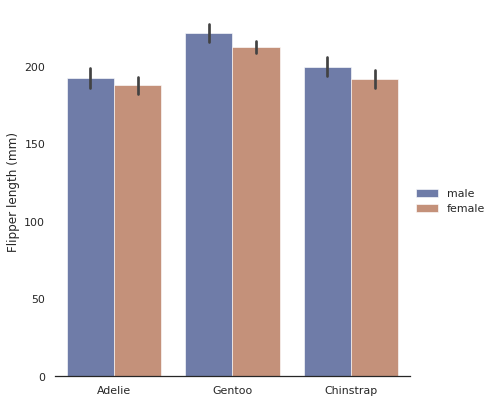

In [32]:
g = sns.catplot(
    data=df, kind="bar",
    x="species", y="flipper_length_mm", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Flipper length (mm)")
g.legend.set_title("")

- Each feature shows that male and female penguins differ in overall size, as well as sizes of each other feature.
  - Males are generally larger then females.

**Now Lets take a look at our missing values again:**

In [33]:
df[df['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
10,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
46,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
177,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
217,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
255,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
267,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [34]:
df.groupby(['species', 'sex'])[['sex']].count()

sex
species   sex        
Adelie    female   73
          male     73
Chinstrap female   34
          male     34
Gentoo    female   58
          male     61

Distribution of Sex is about even for each species so replacing with most common is not a good approach.

**Lets see what the medians for each attribute grouped by `sex` and `species` are:**

In [35]:
bill_len_by_sex_spec = df.groupby(['sex', 'species']).median()['bill_length_mm']
bill_dep_by_sex_spec = df.groupby(['sex', 'species']).median()['bill_depth_mm']
flip_len_by_sex_spec = df.groupby(['sex', 'species']).median()['flipper_length_mm']
body_mass_by_sex_spec = df.groupby(['sex', 'species']).median()['body_mass_g']

for species in set(df['species']):
    for sex in ['female', 'male']:
        print('Median bill length of Species: {}- {}s: {}'.format(species, sex, bill_len_by_sex_spec[sex][species]))
        print('Median bill depth of Species: {}- {}s: {}'.format(species, sex, bill_dep_by_sex_spec[sex][species]))
        print('Median flip length of Species: {}- {}s: {}'.format(species, sex, flip_len_by_sex_spec[sex][species]))
        print('Median body mass of Species: {}- {}s: {}'.format(species, sex, body_mass_by_sex_spec[sex][species]))
        print('-------------------------------------------------------')
print("-------------")

print('Median bill length of all Species: {}'.format(df['bill_length_mm'].median()))
print('Median bill depth of all Species: {}'.format(df['bill_depth_mm'].median()))
print('Median flip length of all Species: {}'.format(df['flipper_length_mm'].median()))
print('Median body mass of all Species: {}'.format(df['body_mass_g'].median()))

Median bill length of Species: Gentoo- females: 45.5
Median bill depth of Species: Gentoo- females: 14.25
Median flip length of Species: Gentoo- females: 212.0
Median body mass of Species: Gentoo- females: 4700.0
-------------------------------------------------------
Median bill length of Species: Gentoo- males: 49.5
Median bill depth of Species: Gentoo- males: 15.7
Median flip length of Species: Gentoo- males: 221.0
Median body mass of Species: Gentoo- males: 5500.0
-------------------------------------------------------
Median bill length of Species: Adelie- females: 37.0
Median bill depth of Species: Adelie- females: 17.6
Median flip length of Species: Adelie- females: 188.0
Median body mass of Species: Adelie- females: 3400.0
-------------------------------------------------------
Median bill length of Species: Adelie- males: 40.6
Median bill depth of Species: Adelie- males: 18.9
Median flip length of Species: Adelie- males: 193.0
Median body mass of Species: Adelie- males: 4000.0

**Since each feature has differences in when grouped by sex and species, maybe we can impute the missing sex values based on the other numerical features:**

# Cleaning KNN Imputer

- Lets Fill the missing values in `sex` using KNN imputation.
- First we need to convert the string values in sex attribute to numeric representations:

In [36]:
# we can first create a dictionary, then map it to the sex feature
sex_map = {'male': 0,
           'female': 1}
sex_map

{'female': 1, 'male': 0}

In [37]:
 df2 = df.copy()

# map dictionary to sex variable
df2['Sex'] = df2['sex'].map(sex_map)
df2.drop(columns=['species', 'island', 'sex'], inplace=True)
df_array_imp = np.array(df2)

**Next we should normalize the data to prevent any bias caused by differing magnitudes of each feature when performing imputation**

- There are several ways to do this but I will demonstrate using `MinMaxScaler`
- This puts all values between 0-1 

In [38]:
from sklearn.preprocessing import MinMaxScaler

preprocess = MinMaxScaler()
array_norm = preprocess.fit_transform(df_array_imp) # fits to data, then transforms it
array_norm

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667, 0.        ],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556, 1.        ],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778, 1.        ],
       ...,
       [0.63636364, 0.60714286, 0.3559322 , 0.29861111, 0.        ],
       [0.68      , 0.70238095, 0.6440678 , 0.38888889, 0.        ],
       [0.65818182, 0.66666667, 0.44067797, 0.29861111, 1.        ]])

In [39]:
from sklearn.impute import KNNImputer

# now we can impute the missing values based on the neighboring values
imputer = KNNImputer(n_neighbors=4)
df_array_imp= imputer.fit_transform(array_norm)

In [40]:
# add column names
df_imputed = pd.DataFrame(df_array_imp, columns=['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g',	'sex'])

**I add the imputed values back to the non-normalized data simply for visualization**
- Later in the modeling process I will handle normalization again

In [41]:
# replace sex column back in original data
df['sex'] = df_imputed['sex'].astype(int)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0


In [42]:
# no more missing values!
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [43]:
# map back to string format for more visuals
sex_map = {0: 'male',
           1: 'female'}
df['sex'] = df['sex'].map(sex_map)

In [44]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


**Let's look for other patterns in the data**

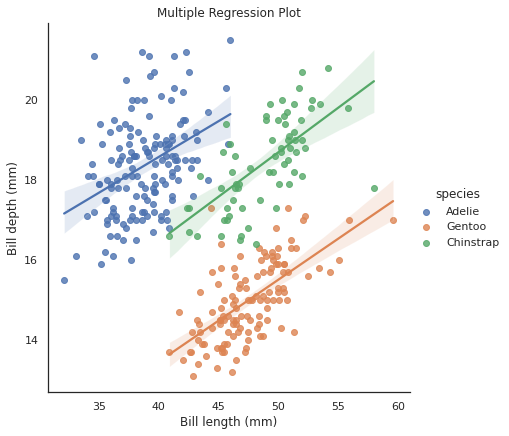

In [45]:
# Regression plot
g = sns.lmplot(data=df,
               x='bill_length_mm', y = 'bill_depth_mm', 
               hue = 'species', height=6)
g.set_axis_labels('Bill length (mm)', 'Bill depth (mm)')
g.set(title = "Multiple Regression Plot")

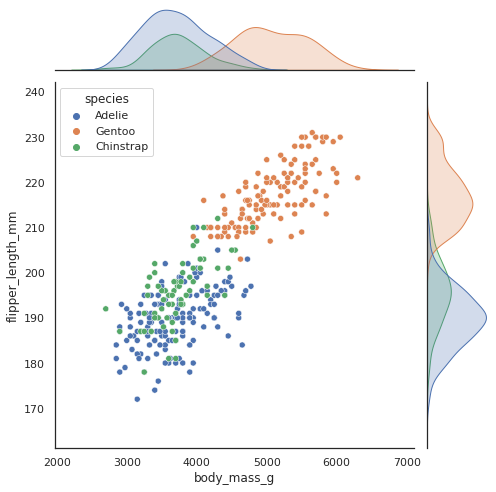

In [46]:
# scatterplot with distributions by colored by species
g = sns.jointplot(x= 'body_mass_g', y = 'flipper_length_mm',
                  data = df, 
                  color = 'm', height = 7, hue = 'species')

- As we saw earlier in the descriptive statistics, Body Mass and Flipper length have the strongest positive correlation among feature; that is easily seen in the plot above.

- Its also worth noting the **nice seperation in flipper length distributions between Adelie and Gentoo** species; this will be a *good feature for training*.

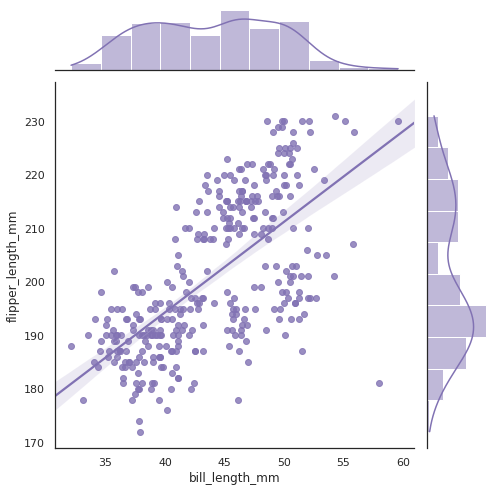

In [47]:
# regression plot
g = sns.jointplot(x= 'bill_length_mm', y = 'flipper_length_mm',
                  data = df, kind = 'reg', truncate = False,
                  color = 'm', height = 7)

[Text(0, 0.5, '')]

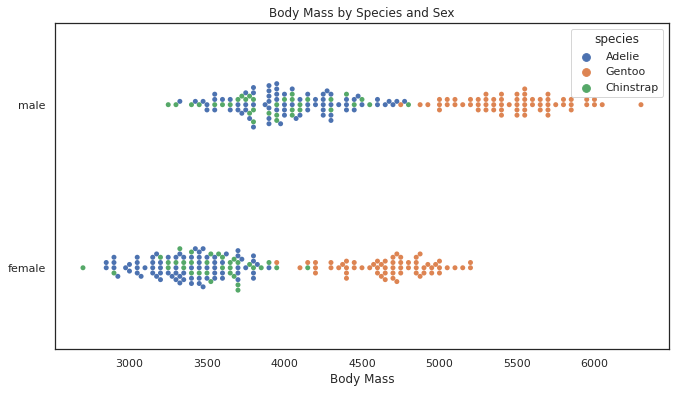

In [48]:
# swarm plot can be used in place of a violin plot to show each observation
ax = plt.figure(figsize=(11,6))
ax = sns.swarmplot(data=df, x = 'body_mass_g', y = 'sex', hue = 'species')
ax.set(xlabel='Body Mass')
ax.set(title = 'Body Mass by Species and Sex')
ax.set(ylabel='')

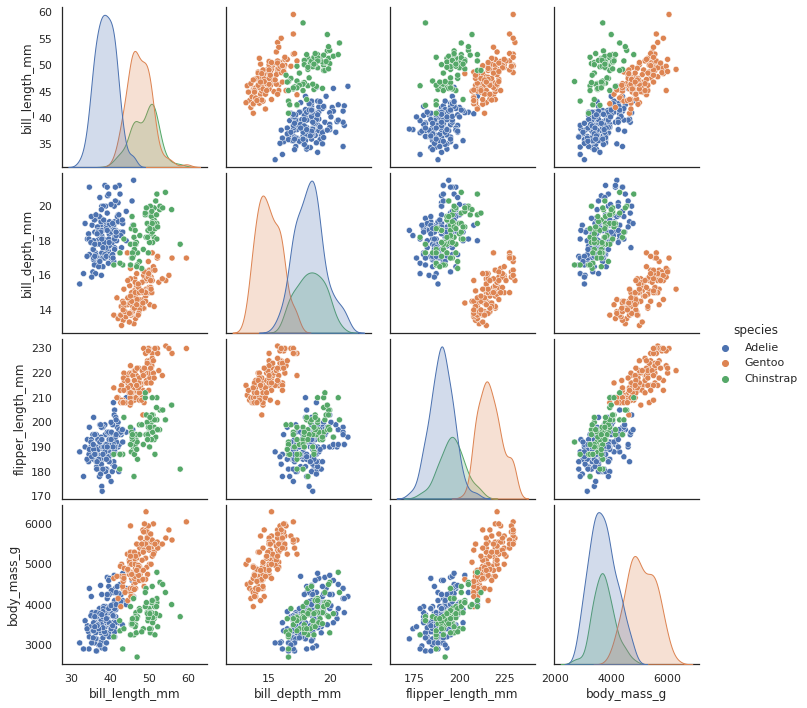

In [49]:
# pairs of scatterplots and distributions
sns.set_theme(style='white')
sns.pairplot(df, hue='species')

# Modeling Examples

Using [Scikit-Learn](https://scikit-learn.org/stable/index.html)

## Logistic Regression - 1 Feature

- Let's start with a model using only 1 feature, `flipper length`

In [50]:
# replace names with integers
species_map = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}

df2 = df.copy() # make copy

# Map Species names as integers
df2['target'] = df2['species'].map(species_map) 

In [51]:
# take one feature and convert to array
X = np.array(df2['flipper_length_mm']).reshape(-1,1)
y = (df2['target'] == 1).astype(np.int) # 1 if Gentoo, else 0

In [52]:
from sklearn.linear_model import LogisticRegression

# specify model parameters and save to an object
log_reg = LogisticRegression(solver = 'lbfgs', random_state = 5)

# Fit model to data
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### PLOT: Probabilities for 1 feature

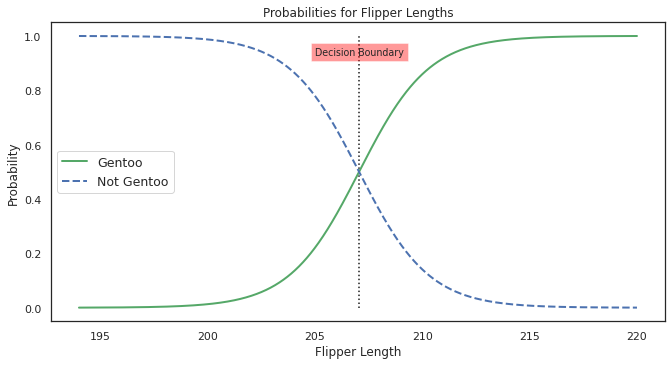

In [53]:
# Return evenly spaced numbers over a min and max interval of feature
X_new = np.linspace(194, 220, 1000).reshape(-1, 1)
# Make prediction on each value
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1]>=0.5][0]

# Plot probabilities for flipper lengths
plt.figure(figsize=(11, 5.5))
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=1.5)
plt.plot(X_new, y_proba[:,1], "g-", linewidth = 2, label = "Gentoo")
plt.plot(X_new, y_proba[:,0], "b--", linewidth = 2, label = "Not Gentoo")
plt.title("Probabilities for Flipper Lengths")
plt.xlabel("Flipper Length")
plt.ylabel("Probability")
plt.legend(loc="center left", fontsize=12.5)
plt.text(205, .93, "Decision Boundary", fontsize = 9.5, bbox=dict(facecolor = 'red', alpha = 0.40))
plt.show()

In [54]:
# Find the value for the decision boundary cutoff
decision_boundary = X_new[y_proba[:, 1]>=0.5][0]
print("For this model, the decision boundary for flipper length is:", str(decision_boundary[0]))

print(" -This means flipper lengths above this value will be classified as a Gentoo")

For this model, the decision boundary for flipper length is: 207.06506506506506
 -This means flipper lengths above this value will be classified as a Gentoo


## Logistic Regression - 2 Features

In [55]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [56]:
# Convert our data to an array
df_array = np.array(df2)
X = df_array[:, (2,3)] # Use features 'bill_length_mm', 'bill_depth_mm'

# Dividing values by 10 for plotting only - normalization should be handled differently for final model
# This simply keeps the transformations simpler
X = X /10

# Define Model parameters
# C is a regularization term; helps avoid overfitting model (solver = Limited Memory Broyden–Fletcher–Goldfarb–Shanno algorithm)
log_reg = LogisticRegression(solver='lbfgs', C=10**5, random_state=5) 

# Fit model
log_reg.fit(X, y)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### PLOT: Probabilities with 2 Features

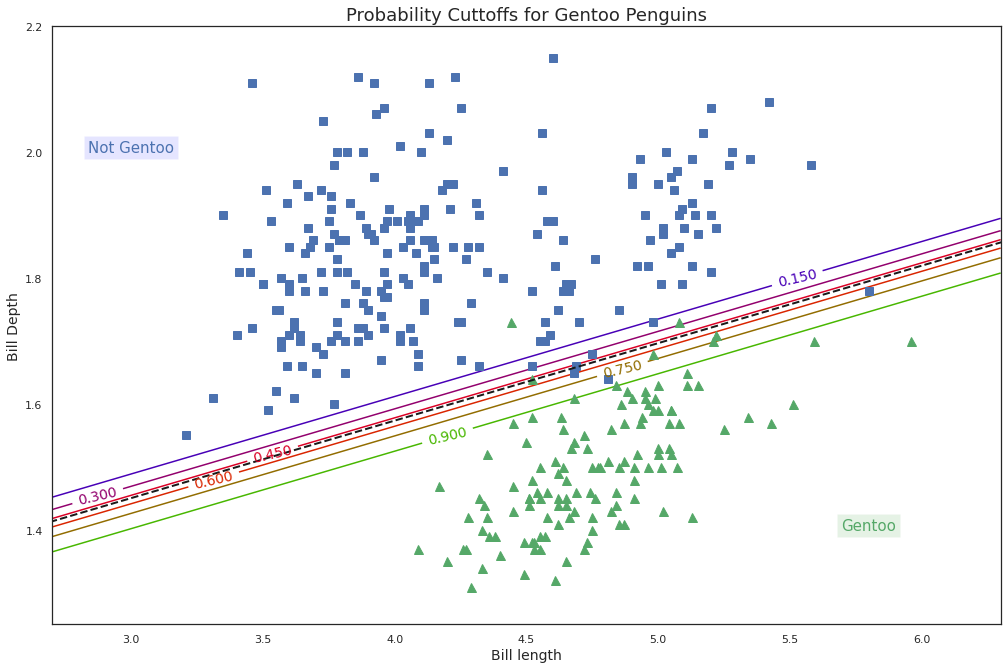

In [57]:
# Return coordinate matrices from coordinate vectors.
x0, x1 = np.meshgrid(
    np.linspace(2.7, 6.3, 500).reshape(-1,1),
    np.linspace(1, 2.2, 500).reshape(-1,1)
    )

X_new = np.c_[x0.ravel(), x1.ravel()] # concatenate arrays along second axis

y_proba = log_reg.predict_proba(X_new) # predict using new data

# plot data as shapes
plt.figure(figsize=(17,11))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", markersize = 8)
plt.plot(X[y==1, 0], X[y==1, 1], "g^", markersize = 9)

# plot a contour map of decision boundaries
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap = plt.cm.brg)

# Calculate decision boundary
left_right = np.array([2,7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

# Define plot parameters
plt.clabel(contour, inline=1, fontsize=14)
plt.plot(left_right, boundary, "k--", linewidth=2)
plt.text(3, 2, "Not Gentoo", fontsize=15, color="b", ha="center", bbox=dict(facecolor = 'blue', alpha = 0.10))
plt.text(5.8, 1.4, "Gentoo", fontsize=15, color="g", ha="center", bbox=dict(facecolor = 'green', alpha = 0.10))
plt.xlabel("Bill length", fontsize=14)
plt.ylabel("Bill Depth", fontsize=14)
plt.axis([2.7, 6.3, 1.25, 2.2])
plt.title("Probability Cuttoffs for Gentoo Penguins", fontsize = 18)
plt.show()


- Based on the two features, Bill length and bill width, our classifier can estimated the probabilities of new penguins.
- Dashed line is the decision boundary for the classification.
- You can see where the model made some misclassifications near the boundaries

## Multinomial Regression / Softmax
- Supports multiple classes
- Predicts one class at a time (cannot be used to predict multiple people in one picture).
- Cost function: Cross-entropy - penalizes the model when it estimates low probabilities for a class.
- Use hyperparameter `multi_class = "multinomial"` to use softmax
- Make sure you use a solver that can handle softmax such as `lbfgs`
- Regularization is applied by default and can be controlled with `C`
  - Higher `C` applies less regularization and lower applies more.

In [58]:
# Same data as before 
# X = df_array[:, (2,1)] # select bill length and width; convert to an array

y = np.array(df2['target'])
# X = X/10 # dividing all by 10 for demo and so the contour plot is more readable - normalization should be applied instead

In [59]:
# define model params
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)

# fit model
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
# Return coordinate matrices from coordinate vectors.
x0, x1 = np.meshgrid(
    np.linspace(2.7, 6.3, 500).reshape(-1,1),
    np.linspace(1, 2.2, 500).reshape(-1,1)
    )

# concatenate arrays along second axis
X_new = np.c_[x0.ravel(), x1.ravel()] 

# prediction probabilties
y_proba = softmax_reg.predict_proba(X_new)
# class predictions
y_predict = softmax_reg.predict(X_new)

# reshape array
zz1 =y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

### Plot Probability Contour Map

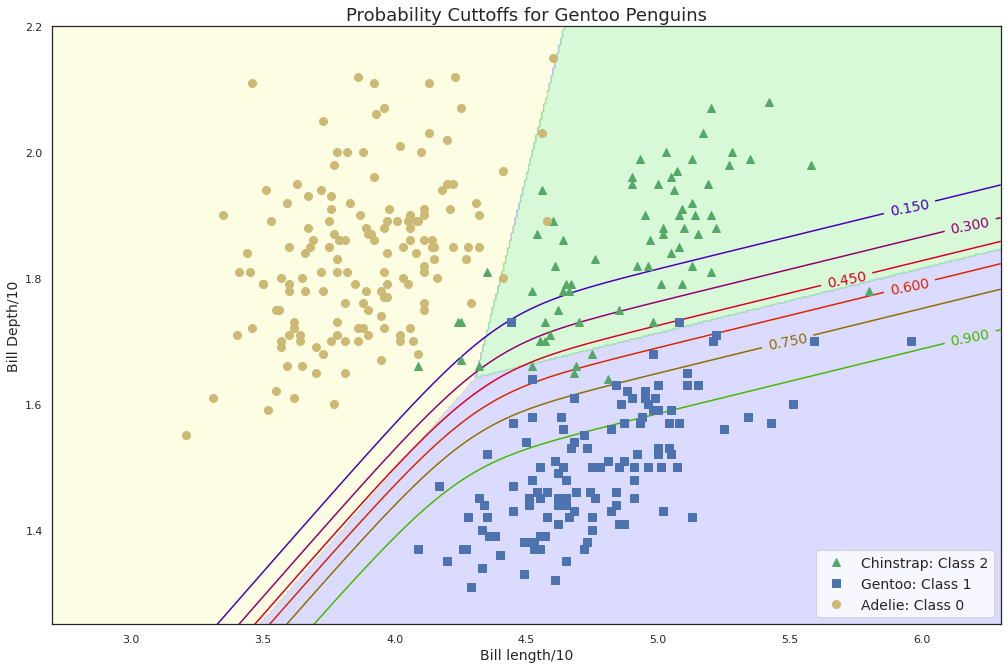

In [61]:
# create markers
plt.figure(figsize=(17, 11))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Chinstrap: Class 2", markersize = 8)
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Gentoo: Class 1", markersize = 8)
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Adelie: Class 0", markersize = 8)

# set color map
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff','lightgreen'])

# plot contour map
plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha = 0.35)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=14)
plt.xlabel("Bill length/10", fontsize=14)
plt.ylabel("Bill Depth/10", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis([2.7, 6.3, 1.25, 2.2])
plt.title("Probability Cuttoffs for Gentoo Penguins", fontsize = 18)
plt.show()

- **Now we can visualize the cutoff probabilities for each species easily**


### Making Predictions

**Predict the penguin species with a Bill length of 50mm and depth of 18**
- Remember we divided all records by 10 for easier plotting

In [62]:
divisor = 10
b_len = 50 / divisor
b_depth = 18 / divisor

print("--------------------------------------")
print("Original Values: ")
print(" Bill Length = 50mm; Bill Depth = 18")
print("")
print("Plotting Coordinates:")
print(" Bill Length = ",b_len)
print(" Bill Depth = ", b_depth)
print("--------------------------------------")
print("With a bill length of 50, and depth of 18, the predicted class would be: ", 
      softmax_reg.predict([[b_len, b_depth]])[0])

--------------------------------------
Original Values: 
 Bill Length = 50mm; Bill Depth = 18

Plotting Coordinates:
 Bill Length =  5.0
 Bill Depth =  1.8
--------------------------------------
With a bill length of 50, and depth of 18, the predicted class would be:  2


# Full Machine Learning Project
- Now we'll complete an end-to-end ML project using the penguins dataset to predict penguin species

In [63]:
# start with fresh copy of the data
df = penguins.copy()
df_strat = df.copy()
# We will drop year since it does not provide useful information
df.drop(columns='year',inplace = True)

# list of features
features = list(df.columns)
df =df.reindex(columns=features)
features

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

## Sampling
- Simple Random Sampling

In [64]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [65]:
# get target variables and drop from frame
y = df.pop('species')
X = df.copy()

- If we wish to do a simple split, we could use the following method.

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 5)

print("Training sample length: ", len(X_train))
print("Validation sample length: ", len(X_val))
print("----------------------------------")
print("Training shape: ", X_train.shape)
print("Validation length: ", X_val.shape)
print('---------------------------')
print("Target sample length: ", y_train.shape)
print("Target sample length: ", y_val.shape)

Training sample length:  275
Validation sample length:  69
----------------------------------
Training shape:  (275, 6)
Validation length:  (69, 6)
---------------------------
Target sample length:  (275,)
Target sample length:  (69,)


**This method does not preserve the representation between species classes as we noted earlier**

Let's see what this means:

In [67]:
y_val.value_counts() / len(y_val)

Adelie       0.463768
Gentoo       0.318841
Chinstrap    0.217391
Name: species, dtype: float64

In [68]:
y_train.value_counts() / len(y_train)

Adelie       0.436364
Gentoo       0.370909
Chinstrap    0.192727
Name: species, dtype: float64

- The proportions of species classes are imbalanced in each set

## Stratified Sampling

- However, if we do not have a balanced sample, we may wish to preserve the distribution in each split.
- We can do this with stratified sampling.

In [69]:
# for comparing the differences between simple random and strat
train, test = train_test_split(df_strat, test_size = 0.2, random_state = 5)

In [70]:
# define strat sampling parameters
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)

# Loop through each record and perform split by species proportion
for train_index, test_index in split.split(df_strat, df_strat['species']):
  strat_train_set = df_strat.loc[train_index]
  strat_test_set = df_strat.loc[test_index]

In [71]:
strat_test_set['species'].value_counts() / len(strat_test_set)

Adelie       0.434783
Gentoo       0.362319
Chinstrap    0.202899
Name: species, dtype: float64

In [72]:
strat_train_set['species'].value_counts() / len(strat_train_set)

Adelie       0.443636
Gentoo       0.360000
Chinstrap    0.196364
Name: species, dtype: float64

- **Voila! Now the proportions of classes are the same in each split**

In [73]:
# define a function that takes input data, and returns proportions of that category
def income_cat_proportions(data):
    return data["species"].value_counts() / len(data)

In [74]:
# Create a dataframe for visualization
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df_strat),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [75]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Adelie,0.441860,0.434783,0.463768,4.958047,-1.601831
Chinstrap,0.197674,0.202899,0.217391,9.974425,2.642796
Gentoo,0.360465,0.362319,0.318841,-11.547452,0.514259


- Stratified sampling is much more representative of the data
- The % error in difference between proportions of species in each sample is much lower than that of simple random sample

In [76]:
# copy data
X_train_strat = strat_train_set.copy()
X_test_strat = strat_test_set.copy()

# pop target variables
y_train_strat = X_train_strat.pop('species')
y_test_strat = X_test_strat.pop('species')

X_train_strat.drop(columns='year', inplace=True)
X_test_strat.drop(columns='year', inplace=True)

## Preprocess Pipelines

**First lets explore ways to deal with missing Values**

- We have missing values in:
  - **Numeric**
    - `bill_length_mm`: float
    - `bill_depth_mm`: float         
    - `flipper_length_mm`: float     
    - `body_mass_g`: float
  - **Categorical:**           
    - `sex`: string `{'male', 'female'}` 
    - `island`: string `{'Biscoe', 'Dream', 'Torgersen'}`            

- We saw above a way to use KNN imputer, but this time I will just use a simple imputer for simplicity.

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector

In [78]:
# define our numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# define our categorical transformer
cat_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('OneHot', OneHotEncoder(handle_unknown='ignore'))
])

# Define our full pipeline
preprocessor = ColumnTransformer(transformers=[ 
    ('num', numeric_transformer, selector(dtype_exclude="object")),
    ('cat', cat_transformer, selector(dtype_exclude="float64"))
])

In [79]:
# fit then transform training data
X_train = preprocessor.fit_transform(X_train_strat)

# # transform test data
X_test = preprocessor.transform(X_test_strat)

# Models

- A simple model will perform just fine for this dataset but lets demo several models for fun.

In [80]:
# import models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [81]:
# List of model names
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

# List of classifiers and parameters
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

In [82]:
y_train = y_train_strat.copy()

In [83]:
# convert labels to numeric representation
species_map = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
y_train = np.array(y_train.map(species_map))
y_test = np.array(y_test_strat.map(species_map))

In [84]:
# iterate over classifiers, fit and return test set scores
for name, clf in zip(names, classifiers):
  clf.fit(X_train, y_train)
  print(name,':',clf.score(X_test, y_test))
  print('---------')

Nearest Neighbors : 0.9710144927536232
---------
Linear SVM : 0.9710144927536232
---------
RBF SVM : 0.9710144927536232
---------
Gaussian Process : 0.9855072463768116
---------
Decision Tree : 0.9565217391304348
---------
Random Forest : 0.9855072463768116
---------
Neural Net : 0.9855072463768116
---------
AdaBoost : 0.7971014492753623
---------
Naive Bayes : 0.7246376811594203
---------


## Short-Listed Models

**Short-listed Best Models**
- Gaussian Process : 0.9855
- Random Forest : 0.9855
- Neural Net : 0.9855

Lets perform some cross validation on these models to see how they perform as we introduce data variation

In [85]:
clf_gaus = GaussianProcessClassifier(1.0 * RBF(1.0))
clf_rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clf_nn = MLPClassifier(alpha=1, max_iter=1000)

clf_gaus.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


**Lets look at the distributions after Cross-Validating:**

In [86]:
from sklearn.model_selection import cross_val_score

# cross validation
gaus_scores = cross_val_score(clf_gaus, X_train, y_train, cv = 4)  
rf_scores = cross_val_score(clf_rf, X_train, y_train, cv = 4) 
nn_scores = cross_val_score(clf_nn, X_train, y_train, cv = 4) 

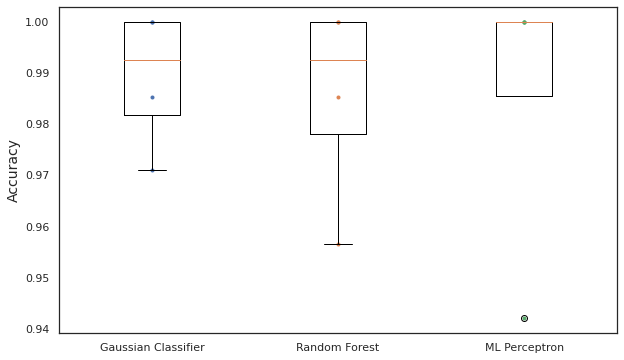

In [87]:
plt.figure(figsize=(10,6))
plt.plot([1]*4, gaus_scores, ".")
plt.plot([2]*4, rf_scores, ".")
plt.plot([3]*4, nn_scores, ".")

plt.boxplot([gaus_scores, rf_scores, nn_scores], labels=("Gaussian Classifier", "Random Forest", "ML Perceptron"))
plt.ylabel("Accuracy", fontsize= 14)
plt.show()

## Feature Importance

**Mean Decrease in Impurity (MDI):**

- Evaluate the importance of features on an artificial classification task. 
- The blue bars are the feature importances of the forest, along with their inter-trees variability represented by the error bars.



In [88]:
feature_names = [f'feature {i}' for i in range(X_train.shape[1])]

In [89]:
importances = clf_rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')


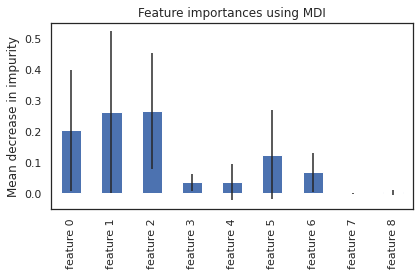

In [90]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
print(X_train_strat.columns)

The plot suggests that the first fer features are informative, while the last two are not.

**Feature importance based on feature permutation**

From [SciKit-Learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#feature-importance-based-on-feature-permutation): Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [91]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

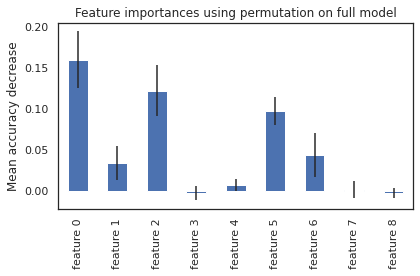

In [92]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Evaluation
- Lets compare other classification metrics


In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("_______________________________________________________________________")
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

        print("_______________________________________________________________________")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


print_score(clf_gaus, X_train, y_train, X_test, y_test, train=True)
print_score(clf_gaus, X_train, y_train, X_test, y_test, train=False)
print_score(clf_rf, X_train, y_train, X_test, y_test, train=True)
print_score(clf_rf, X_train, y_train, X_test, y_test, train=False)
print_score(clf_nn, X_train, y_train, X_test, y_test, train=True)
print_score(clf_nn, X_train, y_train, X_test, y_test, train=False)

_______________________________________________________________________
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1     2  accuracy  macro avg  weighted avg
precision    1.0   1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0   1.0       1.0        1.0           1.0
support    122.0  99.0  54.0       1.0      275.0         275.0
_______________________________________________
Confusion Matrix: 
 [[122   0   0]
 [  0  99   0]
 [  0   0  54]]

_______________________________________________________________________
Test Result:
Accuracy Score: 98.55%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1     2  accuracy  macro avg  weighted avg
precision   0.967742   1.000000   1.0  0.985507   0.989247      0.985975
recall      1.000000   0.960000   1.0  0.985507   0.986667 

- Each model's performance is very good for this dataset

## Final Model

In [94]:
df = penguins.copy()
df.drop(columns='year', inplace=True)
df.drop(index=[3,271], inplace=True) # drop records inplace
df.reset_index(inplace=True, drop=True) # reset index and drop old index

y = df.pop('species')
y = np.array(y.map(species_map))

In [95]:
from sklearn.decomposition import PCA

In [96]:
# define our numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# define our categorical transformer
cat_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('OneHot', OneHotEncoder(handle_unknown='ignore'))
])

# define PCA and modeling
pca_pipe = PCA(n_components=3)

preprocessor = ColumnTransformer(
    transformers = [
      ('num', numeric_transformer, selector(dtype_exclude="object")),
      ('cat', cat_transformer, selector(dtype_include='object'))])

# Define our full pipeline
clf_rf_final = Pipeline(steps=[ 
    ('preprocessor', preprocessor),
    ('pca', pca_pipe),
    ('classifier', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2))
])

In [97]:
clf_rf_final.fit(df, y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [98]:
clf_rf_final.score(df, y)

1.0

# References
**Data originally published in:**

- Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

**Data citations:**

Adélie penguins:

- Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Adélie penguins (Pygoscelis adeliae) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/98b16d7d563f265cb52372c8ca99e60f (Accessed 2020-06-08).

Gentoo penguins:

- Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Gentoo penguin (Pygoscelis papua) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/7fca67fb28d56ee2ffa3d9370ebda689 (Accessed 2020-06-08).

Chinstrap penguins:

- Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Chinstrap penguin (Pygoscelis antarcticus) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 6. Environmental Data Initiative. https://doi.org/10.6073/pasta/c14dfcfada8ea13a17536e73eb6fbe9e (Accessed 2020-06-08).